In [1]:
# Load library
import os
import binascii
import subprocess
import shlex

from scapy.all import *
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [2]:
IMAGE_SIZE = 39
def pkt2vec(pkt):
    ip = pkt['IP']
    hexst = raw(ip).hex()
    arr = np.array([int(hexst[i:i+2], 16) for i in range(0, len(hexst), 2)])
    arr = arr[0:IMAGE_SIZE*IMAGE_SIZE]
    arr = np.pad(arr, (0, IMAGE_SIZE*IMAGE_SIZE-len(arr)), 'constant', constant_values=0)
    fv = np.reshape(arr, (-1, IMAGE_SIZE))
    fv = np.uint8(fv)
    fv = np.stack((fv, fv, fv), axis=2)
    return fv

In [3]:
# read pcap files
def read_pcap(root_dir, ext=('.pcap', '.pcapng')):
    queue = [root_dir]
    while len(queue) != 0:
        nest_dir = queue.pop()
        with os.scandir(nest_dir) as it:
            for entry in it:
                if not entry.name.startswith('.') and entry.is_file():
                    if entry.name.endswith(ext):
                        label = os.path.basename(os.path.dirname(entry.path)) # dirname is label
                        yield label, entry.path
                elif not entry.name.startswith('.') and entry.is_dir():
                    queue.append(entry.path)

In [4]:
def split_pcap(src, dst):
    os.makedirs(dst, exist_ok=True)
    cmd = f'PcapSplitter -f {src} -o {dst} -m connection'
    cmd = shlex.split(cmd)
    subprocess.run(cmd)

In [17]:
## Do not rerun!
# For secure to comment
# pcap_path = os.path.abspath(os.path.expanduser('./data'))
# for label, path in read_pcap(pcap_path):
#     dst = os.path.abspath(os.path.expanduser(os.path.join('./splited_data', label)))
#     split_pcap(path, dst)

In [53]:
## Do not rerun!
splited_path = os.path.abspath(os.path.expanduser('./splited_data'))
cnt = dict()
for label, path in read_pcap(splited_path):
    base = os.path.abspath(os.path.expanduser(os.path.join('./img_data_152', label)))
    os.makedirs(base, exist_ok=True)
    rdp = rdpcap(path, count)
    for pkt in rdp:
        if not pkt.haslayer('IP'):
            continue
        ip = pkt['IP']
        if not (ip.haslayer('TCP') or ip.haslayer('UDP')):
            continue
        if ip.haslayer('TCP'):
            l4 = 'TCP'
        elif ip.haslayer('UDP'):
            l4 = 'UDP'
        if len(raw(ip[l4].payload)) < 152:
            continue
        fv = pkt2vec(pkt)
        num = cnt.get(label, 0)
        dst = os.path.join(base, f'{num:010d}.png')
        cnt[label] = num + 1
        img = Image.fromarray(fv)
        img.save(dst)

In [42]:
path = '/home/harny/Downloads/vimeo1/vimeo1-0046.pcap'

In [43]:
rdp = rdpcap(path, count=1000)

In [98]:
import binascii
from PIL import Image
for pkt in rdp:
    if not pkt.haslayer('IP'):
        continue
    ip = pkt['IP']
    if not (ip.haslayer('TCP') or ip.haslayer('UDP')):
        continue
    hexst = raw(ip).hex()
    arr = np.array([int(hexst[i:i+2], 16) for i in range(0, len(hexst), 2)])
    print(len(arr))
    print(39*39-len(arr))
    arr = np.pad(arr, (0, 39*39-len(arr)), 'constant', constant_values=0)
    fv = np.reshape(arr, (-1, 39))
    fv = np.uint8(fv)
    fv = np.stack((fv, fv, fv), axis=2)
    print(fv.shape)
    img = Image.fromarray(fv)
    img.save('a.png')
#     if ip.haslayer('TCP'):
#         print(ip['TCP'].flags)
# #         break
#     ip = pkt['IP']
    print(int(raw(ip).hex()[0:2], 16))
#     print(raw(ip))
#     print(ip.__repr__())
    
    break

60
1461
(39, 39, 3)
69


In [8]:
path = '/home/harny/Downloads/vimeo1/vimeo1-0046.pcap'
f = open(path, 'rb')
content = f.read()

In [11]:
import binascii
hexst = binascii.hexlify(content)

In [16]:
import numpy as np
fh = np.array([int(hexst[i:i+2], 16) for i in range(0, len(hexst), 2)])

In [29]:
rn = len(fh)//28
fh2 = np.reshape(fh[:rn*28], (-1, 28))
fh3 = np.uint8(fh2)

In [31]:
print(fh[0:10])
print(fh2.shape)
print(fh3.shape)
print(fh3[0:10])

[212 195 178 161   2   0   4   0   0   0]
(6492217, 28)
(6492217, 28)
[[212 195 178 161   2   0   4   0   0   0   0   0   0   0   0   0   0   0
    1   0   1   0   0   0 238  38  28  85]
 [174  45  10   0  74   0   0   0  74   0   0   0 232 231  50  60 101  80
  152 144 150 160  88  47   8   0  69   0]
 [  0  60 123  63  64   0  64   6 172  93 131 202 240 150 209 148 205  41
  133 129   1 187 189  58 255 149   0   0]
 [  0   0 160   2 114  16  19  78   0   0   2   4   5 180   4   2   8  10
    1  28 132 170   0   0   0   0   1   3]
 [  3   7 238  38  28  85  57 144  10   0  74   0   0   0  74   0   0   0
  152 144 150 160  88  47 232 231  50  60]
 [101  80   8   0  69   0   0  60   0   0  64   0  53   6  50 157 209 148
  205  41 131 202 240 150   1 187 133 129]
 [ 57 145 179 124 189  58 255 150 160  18  56 144 239 233   0   0   2   4
    5  70   4   2   8  10 176  57 165 170]
 [  1  28 132 170   1   3   3   5 238  38  28  85  74 144  10   0  66   0
    0   0  66   0   0   0 232 231  50

In [40]:
im.save('a.png')

In [27]:
# b = TCPSession()
# a = sniff(offline='/home/harny/Downloads/pcapplusplus-19.12-ubuntu-18.04-gcc-7/examples/vimeo1/vimeo1-0046.pcap', session=TCPSession)
a.sessions()

{'TCP 131.202.240.150:34177 > 209.148.205.41:443': <PacketList: TCP:11282 UDP:0 ICMP:0 Other:0>,
 'TCP 209.148.205.41:443 > 131.202.240.150:34177': <PacketList: TCP:29065 UDP:0 ICMP:0 Other:0>}

In [7]:
a

<Sniffed: TCP:0 UDP:0 ICMP:0 Other:0>

In [2]:
# read pcap files
def read_pcap(root_dir, ext=('.pcap', '.pcapng')):
    queue = [root_dir]
    while len(queue) != 0:
        nest_dir = queue.pop()
        with os.scandir(nest_dir) as it:
            for entry in it:
                if not entry.name.startswith('.') and entry.is_file():
                    if entry.name.endswith(ext):
                        label = os.path.basename(os.path.dirname(entry.path)) # dirname is label
                        yield label, entry.path
                elif not entry.name.startswith('.') and entry.is_dir():
                    queue.append(entry.path)

In [34]:
# Get sample pcap path
pcap_path = os.path.abspath(os.path.expanduser('./data'))
for path in read_pcap(pcap_path):
    tpath = path
    break
print(f'Sample pcap path: {tpath[1]}')

Sample pcap path: /home/harny/Github/tff-app/data/vimeo/vimeo3.pcap


In [35]:
r = rdpcap('/home/harny/Github/tff-app/data/vimeo/vimeo3.pcap')

In [50]:
len(raw(r[0]['TCP'].payload))

2676

In [ ]:
# pcap to vector
## pkt['Ether'].type == 0x0800 # IPv4 Packet
def pcap2vec(pcap):
    rp = rdpcap(pcap)
    fv = ''
    for key, value in rp.sessions().items():
        protocol = key.split(' ')[0]
        for pkt in value:
            if pkt['Ether'].type != 2048:
                continue
            print(protocol)
            if protocol == 'UDP':
                feature = get_udp_vector(pkt)
            elif protocol == 'TCP':
                feature = get_tcp_vector(pkt)
        assert len(feature) == 56, f'Feature len: {len(feature)}'
        fv = fv + feature
        if len(fv) >= 1568:
            break
    if len(fv) < 2880:
        padding = 2880 - len(fv)
        fv = fv + '0'*padding
    return fv

In [ ]:
rp = rdpcap(tpath[1])
for key, value in rp.sessions().items():
    v = value
    break

In [ ]:
for pkt in v:
    print(pkt.__repr__())
    print(pkt['Ether'].type == 0x0800)

In [67]:
# Metadata analysis
## X-axis: 
## Y-axis: 
data = dict()
pcap_path = os.path.abspath(os.path.expanduser('./data'))
for label, path in read_pcap(pcap_path):
    print(f'{label}; {path}')
    rp = rdpcap(path, count=1024)
    d = data.get(label, dict())
    cnt = len(rp.sessions())
    d[cnt] = d.get(cnt, 0) + 1
    data[label] = d

vimeo; /home/harny/Github/tff-app/data/vimeo/vimeo3.pcap
vimeo; /home/harny/Github/tff-app/data/vimeo/vimeo1.pcap
vimeo; /home/harny/Github/tff-app/data/vimeo/vimeo4.pcap
vimeo; /home/harny/Github/tff-app/data/vimeo/vimeo2.pcap
icqchat; /home/harny/Github/tff-app/data/icqchat/ICQchat2.pcapng
icqchat; /home/harny/Github/tff-app/data/icqchat/icq_chat_3b.pcap
icqchat; /home/harny/Github/tff-app/data/icqchat/ICQchat1.pcapng
icqchat; /home/harny/Github/tff-app/data/icqchat/icq_chat_3a.pcap
voipbuster; /home/harny/Github/tff-app/data/voipbuster/voipbuster_4b.pcap
voipbuster; /home/harny/Github/tff-app/data/voipbuster/voipbuster3b.pcapng
voipbuster; /home/harny/Github/tff-app/data/voipbuster/voipbuster_4a.pcap
voipbuster; /home/harny/Github/tff-app/data/voipbuster/voipbuster1b.pcapng
voipbuster; /home/harny/Github/tff-app/data/voipbuster/voipbuster2b.pcapng
scp; /home/harny/Github/tff-app/data/scp/scpDown2.pcap
scp; /home/harny/Github/tff-app/data/scp/scpUp3.pcap
scp; /home/harny/Github/tff-a

In [26]:
# Metadata analysis
## X-axis: 
## Y-axis: 
data = dict()
datat = dict()
pcap_path = os.path.abspath(os.path.expanduser('./data'))
for label, path in read_pcap(pcap_path):
    rp = rdpcap(path, count=1000)
    d = data.get(label, dict())
    for k, v in rp.sessions().items():
        if 'TCP' not in k: # filter only TCP packets
            continue
        cnt = len(v)
#         if cnt > 5:
#             for pkt in v:
#                 print(cnt, pkt.__repr__())
        d[cnt] = d.get(cnt, 0) + 1
        datat[cnt] = datat.get(cnt, 0) + 1
    data[label] = d

<IPython.core.display.Javascript object>


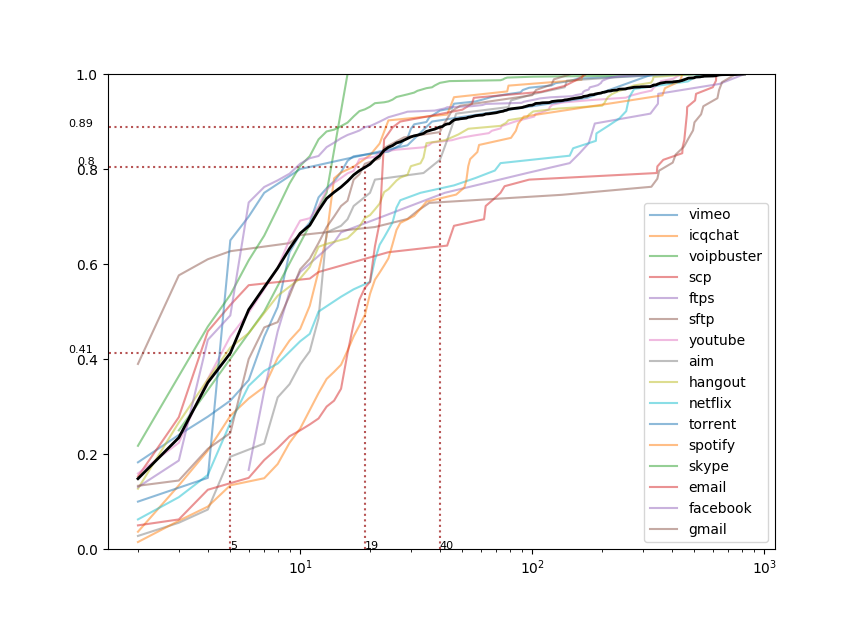

In [66]:
%matplotlib notebook

labels = list()
for key in data.keys():
    labels.append(key)
    dptr = data[key]
    d = list(dptr.items())
    d.sort()
    x = list()
    y = list()
    t = sum([v for k, v in d if k != 1])
    s = 0
    for k, v in d:
        if k == 1:
            continue
        x.append(k)
        s = s + v
        y.append(s/t)
    fig = plt.plot(x, y, alpha=0.5)
d2 = list(datat.items())
d2.sort()
x = list()
y = list()
t = sum([v for k, v in d2 if k != 1])
s = 0
for k, v in d2:
    if k == 1:
        continue
    x.append(k)
    s = s + v
    y.append(s/t)
plt.plot(x, y, color='black', linewidth=2)

plt.vlines(5, 0, y[x.index(5)], color='brown', linestyles='dotted', alpha=0.8)
plt.hlines(y[x.index(5)], 0, 5, color='brown', linestyles='dotted', alpha=0.8)
plt.text(5, 0, round(5,2), fontsize=8)
plt.text(1, y[x.index(5)], round(y[x.index(5)],2), fontsize=8)

for i in y:
    if i >= 0.8:
        y08 = y.index(i)
        x08 = x[y08]
        break

plt.vlines(x08, 0, y[y08], color='brown', linestyles='dotted', alpha=0.8)
plt.hlines(y[y08], 0, x08, color='brown', linestyles='dotted', alpha=0.8)
plt.text(x08, 0, round(x08,2), fontsize=8)
plt.text(1+0.1, y[y08]+0.005, round(y[y08],2), fontsize=8)

plt.vlines(40, 0, y[x.index(40)], color='brown', linestyles='dotted', alpha=0.8)
plt.hlines(y[x.index(40)], 0, 40, color='brown', linestyles='dotted', alpha=0.8)
plt.text(40, 0, round(40,2), fontsize=8)
plt.text(1, y[x.index(40)], round(y[x.index(40)],2), fontsize=8)

plt.xscale('log')
# plt.yscale('log')
plt.ylim((0, 1))
plt.legend(labels)


In [52]:
for i in y:
    if i >= 0.8:
        print(i)
        print(y.index(i))
        print(x[y.index(i)])
        break

0.8035470668485676
17
19
